In [1]:
import pandas as pd
import numpy as np
import glob
import datetime
import matplotlib.pyplot as plt
#import geopandas as gp

In [2]:
foreign_aid = pd.read_csv("../data/us_foreign_aid_complete.csv")

C:\Users\Erin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,43,44,45,48,49,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
foreign_aid.head()

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Activity Start Date,Activity End Date,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,year,Operating Unit
0,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,2,Obligations,2011,NaN,9941000000,11391531078,2011.0,NaN
1,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,2,Obligations,2012,NaN,9243000000,10394677800,2012.0,NaN
2,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,3,Disbursements,2011,NaN,7840175215,8984166544,2011.0,NaN
3,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,3,Disbursements,2013,NaN,7764310985,8573982850,2013.0,NaN
4,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,2,Obligations,2013,NaN,6928000000,7650460330,2013.0,NaN


In [4]:
foreign_aid.shape

(2950513, 54)

In [5]:
print(foreign_aid.columns.tolist())

['Country ID', 'Country Code', 'Country Name', 'Region ID', 'Region Name', 'Income Group ID', 'Income Group Name', 'Income Group Acronym', 'Managing Agency ID', 'Managing Agency Acronym', 'Managing Agency Name', 'Managing Sub-agency or Bureau ID', 'Managing Sub-agency or Bureau Acronym', 'Managing Sub-agency or Bureau Name', 'Implementing Partner Category ID', 'Implementing Partner Category Name', 'Implementing Partner Sub-category ID', 'Implementing Partner Sub-category Name', 'Implementing Partner ID', 'Implementing Partner Name', 'International Category ID', 'International Category Name', 'International Sector Code', 'International Sector Name', 'International Purpose Code', 'International Purpose Name', 'US Category ID', 'US Category Name', 'US Sector ID', 'US Sector Name', 'Funding Acount ID', 'Funding Account Name', 'Funding Agency ID', 'Funding Agency Name', 'Funding Agency Acronym', 'Foreign Assistance Objective ID', 'Foreign Assistance Objective Name', 'Aid Type Group ID', 'Ai

In [6]:
foreign_aid = foreign_aid.rename(columns={
#'Country ID',
'Country Code': 'country_code',
#'Country Name',
#'Region ID',
#'Region Name',
#'Income Group ID',
#'Income Group Name',
#'Income Group Acronym',
#'Managing Agency ID',
'Managing Agency Acronym': 'managing_agency_acr',
'Managing Agency Name': 'managing_agency',
#'Managing Sub-agency or Bureau ID',
'Managing Sub-agency or Bureau Acronym': 'managing_subagency_acr',
'Managing Sub-agency or Bureau Name': 'managing_subagency',
#'Implementing Partner Category ID',
'Implementing Partner Category Name': 'imp_partner_cat',
#'Implementing Partner Sub-category ID',
'Implementing Partner Sub-category Name': 'imp_partner_subcat',
#'Implementing Partner ID',
'Implementing Partner Name': 'imp_partner',
#'International Category ID',
'International Category Name': 'int_category',
#'International Sector Code',
'International Sector Name': 'int_sector',
#'International Purpose Code',
'International Purpose Name': 'int_purpose',
#'US Category ID',
'US Category Name': 'us_category',
#'US Sector ID',
'US Sector Name': 'us_sector',
#'Funding Acount ID',
'Funding Account Name': 'funding_account',
#'Funding Agency ID',
'Funding Agency Name': 'funding_agency',
'Funding Agency Acronym': 'funding_agency_acr',
#'Foreign Assistance Objective ID',
'Foreign Assistance Objective Name': 'objective',
#'Aid Type Group ID',
'Aid Type Group Name': 'aid_type',
#'Activity ID',
#'Submission ID',
'Activity Name': 'activity',
'Activity Description':'description',
'Activity Project Number':'project_num',
'Activity Start Date':'start_date',
'Activity End Date':'end_date',
#'Transaction Type ID',
'Transaction Type Name':'trans_type',
'Fiscal Year':'fiscal_yr',
'Transaction Date':'trans_date',
'Current Dollar Amount':'current_dollar_amount',
'Constant Dollar Amount':'constant_dollar_amount',
'year':'year',
'Operating Unit':'operating_unit'})

In [7]:
print(foreign_aid.columns.tolist())

['Country ID', 'country_code', 'Country Name', 'Region ID', 'Region Name', 'Income Group ID', 'Income Group Name', 'Income Group Acronym', 'Managing Agency ID', 'managing_agency_acr', 'managing_agency', 'Managing Sub-agency or Bureau ID', 'managing_subagency_acr', 'managing_subagency', 'Implementing Partner Category ID', 'imp_partner_cat', 'Implementing Partner Sub-category ID', 'imp_partner_subcat', 'Implementing Partner ID', 'imp_partner', 'International Category ID', 'int_category', 'International Sector Code', 'int_sector', 'International Purpose Code', 'int_purpose', 'US Category ID', 'us_category', 'US Sector ID', 'us_sector', 'Funding Acount ID', 'funding_account', 'Funding Agency ID', 'funding_agency', 'funding_agency_acr', 'Foreign Assistance Objective ID', 'objective', 'Aid Type Group ID', 'aid_type', 'Activity ID', 'Submission ID', 'activity', 'description', 'project_num', 'start_date', 'end_date', 'Transaction Type ID', 'trans_type', 'fiscal_yr', 'trans_date', 'current_doll

In [8]:
mexico = foreign_aid.loc[foreign_aid["country_code"].isin(['MEX'])]
mexico

,Country ID,country_code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,managing_agency_acr,...,start_date,end_date,Transaction Type ID,trans_type,fiscal_yr,trans_date,current_dollar_amount,constant_dollar_amount,year,operating_unit
458,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,...,NaN,NaN,2,Obligations,2010,NaN,535151684,625474521,2010.0,NaN
526,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,...,NaN,NaN,2,Obligations,2015,NaN,455185015,487524827,2015.0,NaN
768,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,...,NaN,NaN,2,Obligations,2014,NaN,301159001,326284598,2014.0,NaN
831,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,...,NaN,NaN,3,Disbursements,2011,NaN,295191410,338263970,2011.0,NaN
967,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,2,STATE,...,NaN,NaN,2,Obligations,2011,NaN,253166913,290107510,2011.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950484,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,98,NaN,...,NaN,NaN,18,President's Budget Requests,2015,NaN,3225,3454,2015.0,NaN
2950485,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,98,NaN,...,NaN,NaN,1,Appropriated and Planned,2016,NaN,3063,3252,2016.0,NaN
2950486,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,98,NaN,...,NaN,NaN,1,Appropriated and Planned,2017,NaN,3057,3189,2017.0,NaN
2950487,484,MEX,Mexico,6,Western Hemisphere,3.0,Upper Middle Income Country,UMIC,98,NaN,...,NaN,NaN,1,Appropriated and Planned,2006,NaN,3000,3751,2006.0,Mexico


In [9]:
mexico = mexico[[
'country_code',
#'managing_agency_acr',
'managing_agency',
#'managing_subagency_acr',
'managing_subagency',
'imp_partner_cat',
'imp_partner_subcat',
'imp_partner',
'int_category',
'int_sector',
'int_purpose',
'us_category',
'us_sector',
'funding_account',
'funding_agency',
#'funding_agency_acr',
'objective',
'aid_type',
'activity',
'description',
'project_num',
'start_date',
'end_date',
'trans_type',
'fiscal_yr',
'trans_date',
'current_dollar_amount',
'constant_dollar_amount',
'year',
'operating_unit']]
mexico.head()

,country_code,managing_agency,managing_subagency,imp_partner_cat,imp_partner_subcat,imp_partner,int_category,int_sector,int_purpose,us_category,...,project_num,start_date,end_date,trans_type,fiscal_yr,trans_date,current_dollar_amount,constant_dollar_amount,year,operating_unit
458,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaN,NaN,Obligations,2010,NaN,535151684,625474521,2010.0,NaN
526,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaN,NaN,Obligations,2015,NaN,455185015,487524827,2015.0,NaN
768,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaN,NaN,Obligations,2014,NaN,301159001,326284598,2014.0,NaN
831,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaN,NaN,Disbursements,2011,NaN,295191410,338263970,2011.0,NaN
967,MEX,Department of State,International Narcotics and Law Enforcement Af...,Government,Government - United States,U.S. Government - Department of State,Governance,Government and Civil Society,Legal and judicial development,"Democracy, Human Rights, and Governance",...,NaN,NaN,NaN,Obligations,2011,NaN,253166913,290107510,2011.0,NaN


In [10]:
mexico = mexico.dropna(axis=1,how='all')

In [11]:
# mexico[['country_code', 'managing_agency', 'managing_subagency','imp_partner_cat', 'imp_partner_subcat', 'imp_partner',
#    'int_category', 'int_sector', 'int_purpose', 'us_category','us_sector','funding_account','funding_agency',
#    'objective','aid_type','activity','description','operating_unit']] = mexico[['country_code', 'managing_agency',
#    'managing_subagency','imp_partner_cat', 'imp_partner_subcat', 'imp_partner', 'int_category', 'int_sector',
#    'int_purpose', 'us_category','us_sector','funding_account','funding_agency','objective','aid_type','activity',
#    'description','operating_unit']].astype(str)

In [12]:
mexico = mexico.replace('1976tq', '1976')
mexico[['fiscal_yr', 'year']]=mexico[['fiscal_yr', 'year']].astype(int)

In [13]:
mexico[['start_date', 'end_date', 'trans_date']]=mexico[['start_date', 'end_date','trans_date']].astype(str)
mexico[['start_date', 'end_date', 'trans_date']]=mexico[['start_date', 'end_date','trans_date']].astype('datetime64[ns]')

In [14]:
mexico.dtypes

country_code                      object
managing_agency                   object
managing_subagency                object
imp_partner_cat                   object
imp_partner_subcat                object
imp_partner                       object
int_category                      object
int_sector                        object
int_purpose                       object
us_category                       object
us_sector                         object
funding_account                   object
funding_agency                    object
objective                         object
aid_type                          object
activity                          object
description                       object
project_num                       object
start_date                datetime64[ns]
end_date                  datetime64[ns]
trans_type                        object
fiscal_yr                          int32
trans_date                datetime64[ns]
current_dollar_amount              int64
constant_dollar_

In [15]:
mexico_v2 = mexico.groupby([mexico['fiscal_yr']]).agg({'constant_dollar_amount': sum}).reset_index()
mexico_v2.shape

(77, 2)

<AxesSubplot:xlabel='fiscal_yr'>

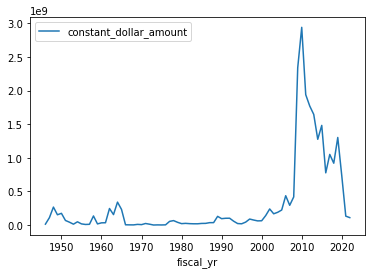

In [16]:
mexico_v2.plot(x='fiscal_yr', y='constant_dollar_amount', kind= 'line')

In [17]:
#cell to explore contents of various cells
explore = mexico['funding_account'].unique()
explore

array(['International Narcotics Control and Law Enforcement',
       'Foreign Military Financing Program',
       'Department of Defense, Drug Interdiction and Counter-Drug Activities',
       'Commodity Credit Corporation Fund',
       'Department of  State, Migration and Refugee Assistance',
       'INACTIVE - Foot & Mouth Disease', 'INACTIVE - USAID Loans',
       'Economic Support Fund', 'INACTIVE - USAID Grants',
       'Department of Energy, Defense Nuclear Nonproliferation',
       'Public Law 480 Title II Grants',
       'Department of Defense, Operation and Maintenance, Defense-Wide',
       'Public Law 480 Title I Food for Progress Credits, Program Account',
       'Military Assistance Programs (Old Code)',
       'INACTIVE - Social Progress Trust Fund (Loans)',
       'Agency for International Development, Development Assistance',
       'Department of Labor, Departmental Management, Salaries and Expenses',
       'Agency for International Development, Child Survival and Hea

In [18]:
narcotics_account = mexico[mexico['funding_account'].str.contains(
"International Narcotics Control and Law Enforcement|Foreign Military Financing Program|Department of Defense, Drug Interdiction and Counter-Drug Activities|Foreign Military Financing, Direct Loan Program Account")]
narcotics_account['funding_account'].unique()

array(['International Narcotics Control and Law Enforcement',
       'Foreign Military Financing Program',
       'Department of Defense, Drug Interdiction and Counter-Drug Activities',
       'Foreign Military Financing, Direct Loan Program Account'],
      dtype=object)

In [19]:
narcotics_account.shape

(427, 27)

In [20]:
# WHATS THE DIFFERENCE BETWEEN A DISBURSEMENT AND AN OBLIGATION
# What is the difference between NaT and NaN
# Is money spent in the FY or in the Year
# Money is spent in the FY
# Is there funding for narcotics programs that does NOT fall under international narcotics and law enforcement affairs?
# Yes - not all Merida Initiative funding does. This may indicate that other aid packages make something more drug war adgacent. 

In [21]:
obligations = narcotics_account.loc[mexico["trans_type"].isin(['Obligations'])]
disbursements = narcotics_account.loc[mexico["trans_type"].isin(['Disbursements'])]

In [22]:
obligations.shape

(128, 27)

In [23]:
disbursements.shape

(95, 27)

In [24]:
# INCLUDES BOTH OBLIGATIONS AND DISBURSEMENTS
narcotics_acc = narcotics_account.groupby([narcotics_account['fiscal_yr']]).agg({'constant_dollar_amount': sum})
narc = narcotics_acc.reset_index()

<AxesSubplot:xlabel='fiscal_yr'>

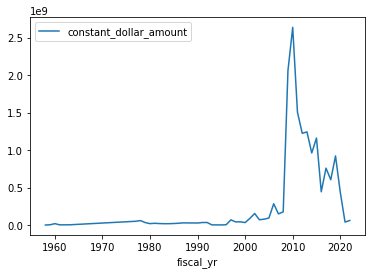

In [25]:
narc.plot(x='fiscal_yr', y='constant_dollar_amount', kind= 'line')

In [26]:
disbursements_v2 = disbursements.groupby([disbursements['fiscal_yr']]).agg({'constant_dollar_amount': sum})
disb = disbursements_v2.reset_index()
disb

,fiscal_yr,constant_dollar_amount
0,2001,44519173
1,2002,76670216
2,2003,34945652
3,2004,14288017
4,2005,26679143
5,2006,65738064
6,2007,39666869
7,2008,61332642
8,2009,117045845
9,2010,279353583


In [27]:
mexico['fiscal_yr'].value_counts()

2017    1717
2016    1628
2015    1592
2018    1551
2009    1535
        ... 
1953       2
1971       2
1948       2
1955       2
1946       1
Name: fiscal_yr, Length: 77, dtype: int64

<AxesSubplot:xlabel='fiscal_yr'>

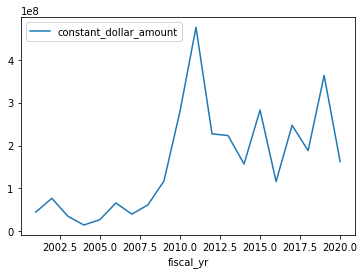

In [28]:
disb.plot(x='fiscal_yr', y='constant_dollar_amount', kind= 'line')

In [29]:
year_2010 = mexico.loc[mexico["fiscal_yr"].isin([2010])]
year_2010.shape

(1325, 27)

In [30]:
year_2010['funding_account'].value_counts()

Economic Support Fund                                                            362
Agency for International Development, Development Assistance                     305
Agency for International Development, Operating Expenses                         183
Department of State, Global Health Programs                                       73
Agency for International Development, Child Survival and Health Programs Fund     72
U.S. Fish and Wildlife Service, Multinational Species Conservation Fund           56
Nonproliferation, Anti-Terrorism, Demining and Related Programs                   37
Peace Corps                                                                       36
International Narcotics Control and Law Enforcement                               32
U.S. Fish and Wildlife Service, North American Wetlands Conservation Fund         22
Trade and Development Agency                                                      19
Department of State, National Endowment for Democracy            

In [31]:
disbursements.to_csv('../data/foreign_aid.csv')